In [2]:
%matplotlib widget

In [3]:
from functools import partial

In [4]:
from libschrodinger.crank_nicolson_2d import *

In [5]:
from libschrodinger.potentials import *

In [6]:
from libschrodinger.campaigns import *

In [7]:
import numpy as np

In [8]:
import pandas as pd

In [9]:
from pathlib import Path

In [10]:
from typing import Dict

In [14]:
caseName : str = "momentum_space0"

In [15]:
class PropigationDirection(Enum): 
    Forward : float = 1
    Backward : float = -1

In [16]:
def makeNonDispersiveWavePacket(
            grid, 
            startX : float, 
            startY : float, 
            angularFrequency : float, 
            speedOfLight : float, 
            sigma : float, 
            direction : PropigationDirection = PropigationDirection.Backward
        ): 
    waveNumber = angularFrequency / speedOfLight
    ##wave = np.exp(1j * waveNumber * ((grid.x - startX) + (grid.y - startY)))
    #wave = np.exp((-grid.x ** 2 + 1j * waveNumber * grid.x) + (-grid.y ** 2 + 1j * waveNumber * grid.y))
    #amplitude = (1 / np.sqrt(2))
    #return wave
    velocityPart = math.exp(1j * waveNumber * (grid.x - startX))
    stationaryPart = math.exp(-1 / 2 * ((grid.x - startX) ** 2 + (grid.y - startY) ** 2) / sigma ** 2)
    return stationaryPart * velocityPart


In [17]:
math = np
spatialStep : float = .01
length : float = 1
temporalStep : float = (spatialStep ** 2) / 4
courantNumber : float = 1.0
pointCount : int = int(length / spatialStep)
potentialHeight : float = 200
preRegionLength = .3
preRegionScalar = 10
packetStandardDeviation : float = preRegionLength / preRegionScalar
packetStartX : float = 1 - ((preRegionScalar / 2) * packetStandardDeviation)
packetStartY : float = .5
angularFrequency : float = 50.0
speedOfLight : float = 1
#packetWaveNumber : float = 13 * np.pi

barrierCount : int = 3
postRegionLength = .3
intraRegionLength : float = 1 - (postRegionLength + preRegionLength)
barrierWidth : float = intraRegionLength / barrierCount
constantPotentialLengthRatios : List[float] = [postRegionLength] \
        + ([barrierWidth] * barrierCount) \
        + [preRegionLength]
print("Point Count: ", pointCount)
print("Post Region Length: ", postRegionLength)
print("Intra Region Length: ", intraRegionLength)
print("Pre Region Length: ", preRegionLength)
print("Barrier Length: ", barrierWidth)
print("Total Length: ", intraRegionLength + postRegionLength + preRegionLength)
print("Total Length Ratios: ", np.sum(constantPotentialLengthRatios))
frameCount : int = 650
backend = "numpy"

Point Count:  100
Post Region Length:  0.3
Intra Region Length:  0.4
Pre Region Length:  0.3
Barrier Length:  0.13333333333333333
Total Length:  1.0
Total Length Ratios:  1.0


In [18]:
wavePacketFunction = lambda position : makeNonDispersiveWavePacket(
            position, 
            packetStartX * length, 
            packetStartY * length, 
            angularFrequency, 
            speedOfLight, 
            packetStandardDeviation
        )

In [19]:
potentials : List[List[float]] = [
        [0, 0, 0, 0, 0]
    ]

In [20]:
profiles : List[SimulationProfile] = constantSimulationProfiles(
        wavePacketFunction, 
        spatialStep, 
        temporalStep, 
        length, 
        constantPotentialLengthRatios, 
        potentials, 
        False, 
        pointCount, 
        False, 
        edgeBound = True
    )

In [21]:
constantPotentialLengthRatios

[0.3, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.3]

In [22]:
allData, simulations = recordConstantRegionSimulations(
        profiles, 
        frameCount, 
        caseName, 
        constantPotentialLengthRatios, 
        True, 
        constantRegionLabels = ["Post", "3rdStair", "2ndStair", "1stStair", "Pre"], 
        showBar = True, 
        showFPS = True, 
        showTotalTime = True, 
        discardSimulations = False
    )

[====================================================================================================]
[----------------------------------------------------------------------------------------------------]
Total Time:  47.814783944000055
Frames Per Second:  14.202864757818894
Simulation 0 is done, processing probabilities.
Simulation 0: done processing probabilities.
Simulation 0: logging.
Saving Video of momentum_space00
Saving Video of Post
Saving Video of 3rdStair
Saving Video of 2ndStair
Saving Video of 1stStair
Saving Video of Pre
Done logging momentum_space00
Producing Simulation final output CSV


In [23]:
allData["packetStartX"] = packetStartX
allData["packetStartY"] = packetStartY
allData["initialWaveNumber"] = "NULL"#packetWaveNumber
allData["standardDeviation"] = packetStandardDeviation

In [24]:
pd.DataFrame(allData).to_csv(str(Path.cwd() / caseName / (caseName + ".csv")))

In [25]:
from numpy.fft import fft, ifft, fft2, ifft2

In [26]:
simulation = simulations[0]

In [35]:
firstWaveFunction = simulation.waveFunctions[1]

/tmp/ipykernel_270/2611361299.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(np.float64(firstWaveFunction * np.conjugate(firstWaveFunction)))


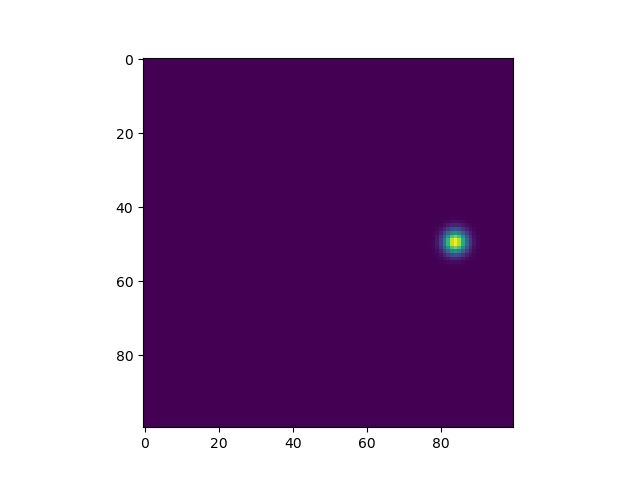

In [36]:
plt.figure()
plt.imshow(np.float64(firstWaveFunction * np.conjugate(firstWaveFunction)))

/tmp/ipykernel_270/2068215190.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  conjugated = np.float64(transformed * np.conjugate(transformed))


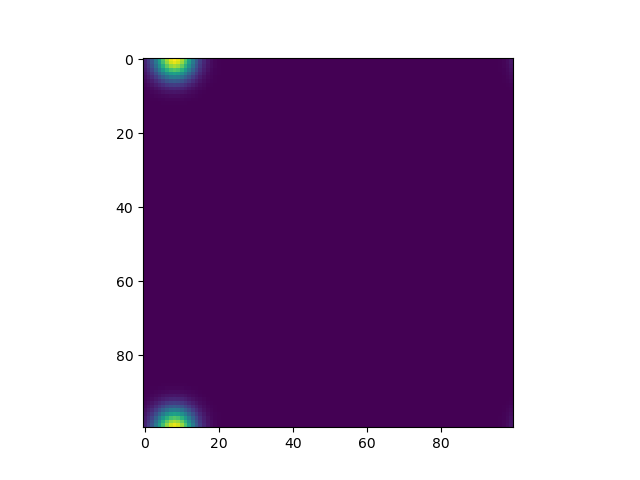

In [37]:
transformed = fft2(firstWaveFunction)
conjugated = np.float64(transformed * np.conjugate(transformed))
plt.figure()
plt.imshow(conjugated)

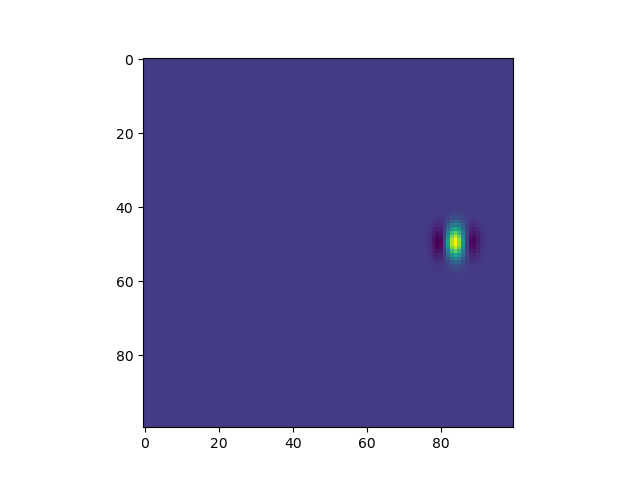

In [38]:
plt.figure()
plt.imshow(np.real(firstWaveFunction))

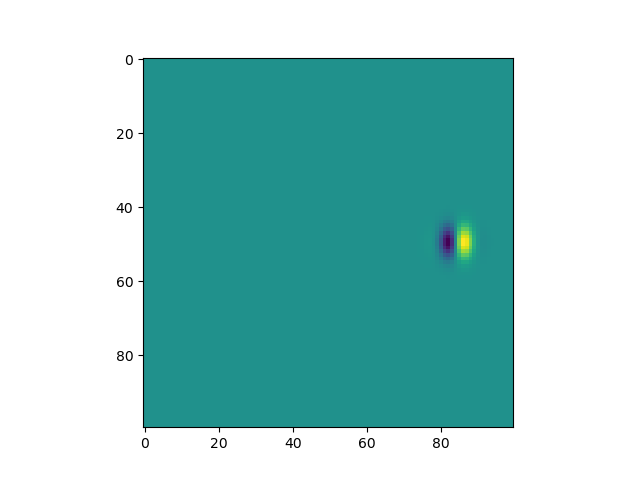

In [44]:
plt.figure()
plt.imshow(np.imag(firstWaveFunction))

/tmp/ipykernel_257/27344338.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  conjugated = np.float64(transformed * np.conjugate(transformed))


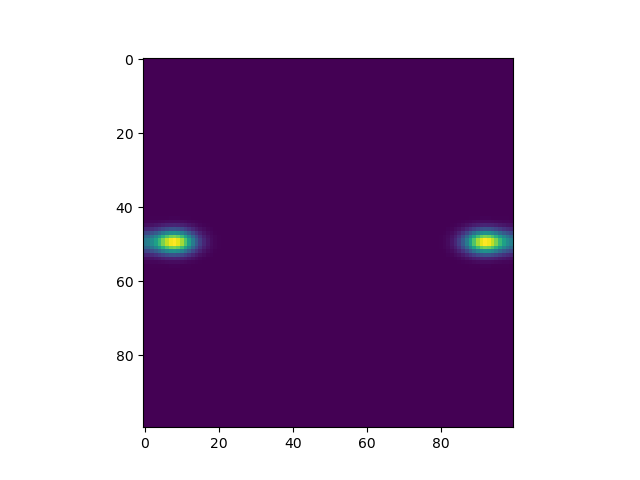

In [61]:
plt.figure()
transformed = fft(np.real(firstWaveFunction))
conjugated = np.float64(transformed * np.conjugate(transformed))
plt.imshow(conjugated)

/tmp/ipykernel_257/1644908153.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  conjugated = np.float64(transformed * np.conjugate(transformed))


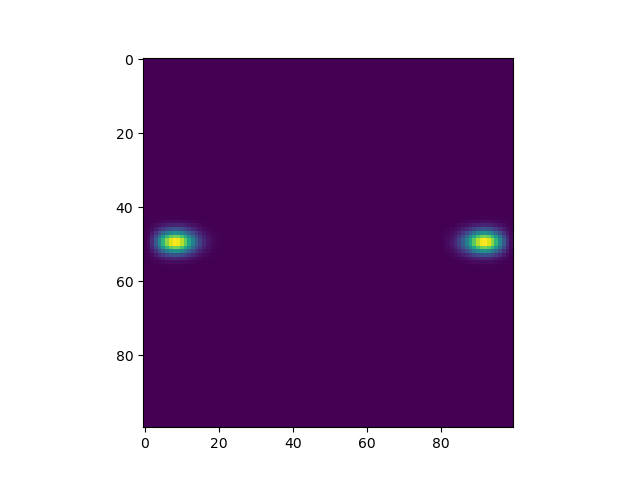

In [52]:
plt.figure()
transformed = ifft(np.imag(firstWaveFunction))
conjugated = np.float64(transformed * np.conjugate(transformed))
plt.imshow(conjugated)